# Plot Mass conservation from EV files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style("ticks")

In [2]:

def read_ev(filename):
    
    data = []
    headers = []

    with open(filename) as file:

        # Get header labels
        line = file.readline()
        line = line.strip()
        line = line[3:len(line)-1]
        headers = line.split(']   [')
        headers = [x[2:].strip() for x in headers]

        # Read data
        for line in file.readlines():
            line = line.strip().split()
            line = [float(x) for x in line]
            data.append(line)
            
    return pd.DataFrame(data, columns=headers)

In [3]:
df_3mic_nl = read_ev('3mic/nonlimited/3mic256nl01.ev')
df_3mic_nl = pd.concat([df_3mic_nl, read_ev('3mic/nonlimited/3mic256nl02.ev')])
df_3mic_nl = pd.concat([df_3mic_nl, read_ev('3mic/nonlimited/3mic256nl03.ev')]).reset_index(drop=True).drop_duplicates(keep='first', subset='time')

In [4]:
df_3mic_l = read_ev('3mic/limited/3mic256l01.ev')
df_3mic_l = pd.concat([df_3mic_l, read_ev('3mic/limited/3mic256l02.ev')])
df_3mic_l = pd.concat([df_3mic_l, read_ev('3mic/limited/3mic256l03.ev')])
df_3mic_l = pd.concat([df_3mic_l, read_ev('3mic/limited/3mic256l04.ev')])
df_3mic_l = df_3mic_l[df_3mic_l.time < 5.25 * 0.05]
df_3mic_l = pd.concat([df_3mic_l, read_ev('3mic/limited/3mic256l05.ev')])
df_3mic_l = pd.concat([df_3mic_l, read_ev('3mic/limited/3mic256l06.ev')]).reset_index(drop=True).drop_duplicates(keep='first', subset='time')

In [5]:
df_10mic_nl = read_ev('10mic/limited/10mic256l01.ev')
df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl02.ev')])
df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl03.ev')])
df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl04.ev')])
df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl05.ev')])
df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl06.ev')]).reset_index(drop=True).drop_duplicates(keep='first', subset='time')
# df_10mic_nl = pd.concat([df_10mic_nl, read_ev('10mic/nonlimited/10mic256nl07.ev')])


In [6]:
df_10mic_l = read_ev('10mic/limited/10mic256l01.ev')
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l02.ev')])
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l03.ev')])
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l04.ev')])
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l05.ev')])
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l06.ev')])
df_10mic_l = df_10mic_l[df_10mic_l.time < 6 * 0.05]
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l07.ev')])
df_10mic_l = pd.concat([df_10mic_l, read_ev('10mic/limited/10mic256l08.ev')]).reset_index(drop=True).drop_duplicates(keep='first', subset='time')

In [7]:
df_3mic_nl.columns

Index(['time', 'ekin', 'etherm', 'emag', 'epot', 'etot', 'erad', 'totmom',
       'angtot', 'rho max', 'rho ave', 'dt', 'totentrop', 'rmsmach', 'vrms',
       'xcom', 'ycom', 'zcom', 'alpha max', 'dust/gas X', 'dust/gas A',
       'dust/gas N', 't_s max', 't_s min', 'DustMass  1'],
      dtype='object')

In [8]:
df_3mic_nl['time'] = df_3mic_nl['time'] / 0.05
df_3mic_l['time'] = df_3mic_l['time'] / 0.05
df_10mic_nl['time'] = df_10mic_nl['time'] / 0.05
df_10mic_l['time'] = df_10mic_l['time'] / 0.05

In [9]:
df_3mic_l[df_3mic_l.time > 5].describe()

,time,ekin,etherm,emag,epot,etot,erad,totmom,angtot,rho max,...,xcom,ycom,zcom,alpha max,dust/gas X,dust/gas A,dust/gas N,t_s max,t_s min,DustMass 1
count,11993.000000,11993.000000,11993.0,11993.0,11993.0,11993.000000,11993.0,1.199300e+04,11993.000000,11993.000000,...,11993.000000,11993.000000,11993.000000,11993.0,11993.000000,11993.000000,1.199300e+04,11993.000000,11993.000000,11993.000000
mean,12.223716,49.219117,1.5,0.0,0.0,50.719117,0.0,2.301927e-04,0.441817,1092.907157,...,0.503877,0.517755,0.501240,1.0,0.157689,0.010138,4.342173e-21,3.070569,0.000007,0.009916
std,4.254199,3.436680,0.0,0.0,0.0,3.436680,0.0,5.463043e-04,0.276002,564.774025,...,0.021016,0.019226,0.029319,0.0,0.013427,0.000010,3.893067e-20,1.647125,0.000003,0.000009
min,5.001367,40.613745,1.5,0.0,0.0,42.113745,0.0,2.429028e-11,0.070214,329.141779,...,0.472211,0.479141,0.429571,1.0,0.130514,0.010116,6.388216e-30,0.823593,0.000001,0.009902
25%,8.496875,47.060059,1.5,0.0,0.0,48.560059,0.0,1.539674e-08,0.231770,739.570256,...,0.484955,0.505335,0.484619,1.0,0.147689,0.010130,4.791877e-23,1.901188,0.000005,0.009909
50%,12.288281,49.166599,1.5,0.0,0.0,50.666599,0.0,6.372786e-06,0.361467,941.037333,...,0.501388,0.518036,0.502163,1.0,0.154710,0.010140,3.383220e-22,2.517431,0.000006,0.009916
75%,15.791943,51.441744,1.5,0.0,0.0,52.941744,0.0,8.537012e-05,0.603841,1276.903767,...,0.518377,0.529531,0.525906,1.0,0.164700,0.010146,1.547119e-21,3.901208,0.000008,0.009924
max,20.000000,59.531539,1.5,0.0,0.0,61.031539,0.0,3.613037e-03,1.141895,5565.642972,...,0.556188,0.576459,0.553177,1.0,0.209471,0.010153,2.335400e-18,8.412349,0.000019,0.009932


In [10]:
df_3mic_nl[df_3mic_nl.time > 5].describe()

,time,ekin,etherm,emag,epot,etot,erad,totmom,angtot,rho max,...,xcom,ycom,zcom,alpha max,dust/gas X,dust/gas A,dust/gas N,t_s max,t_s min,DustMass 1
count,10295.000000,10295.000000,10295.0,10295.0,10295.0,10295.000000,10295.0,1.029500e+04,10295.000000,10295.000000,...,10295.000000,10295.000000,10295.000000,10295.0,10295.000000,10295.000000,1.029500e+04,10295.000000,1.029500e+04,10295.000000
mean,11.008334,49.263567,1.5,0.0,0.0,50.763567,0.0,2.440325e-04,0.392034,1171.859049,...,0.497065,0.507036,0.494821,1.0,0.240558,0.010225,5.079188e-21,3.311613,6.254675e-06,0.009985
std,3.389710,3.204338,0.0,0.0,0.0,3.204338,0.0,5.980001e-04,0.178897,674.262826,...,0.025171,0.022290,0.020748,0.0,0.035735,0.000032,1.150946e-19,1.830526,2.325319e-06,0.000030
min,5.001953,38.792937,1.5,0.0,0.0,40.292937,0.0,3.831323e-12,0.057837,399.292166,...,0.439683,0.464839,0.436349,1.0,0.173701,0.010170,1.519057e-30,0.942871,9.020285e-07,0.009932
25%,8.099512,47.577119,1.5,0.0,0.0,49.077119,0.0,8.480076e-09,0.266464,779.754589,...,0.478763,0.492412,0.481076,1.0,0.213462,0.010198,4.638333e-23,1.850549,4.690925e-06,0.009959
50%,11.012256,49.499431,1.5,0.0,0.0,50.999431,0.0,4.520978e-06,0.371399,1011.287990,...,0.497371,0.504402,0.498833,1.0,0.235527,0.010226,3.059090e-22,2.799952,6.023937e-06,0.009985
75%,13.834082,51.353736,1.5,0.0,0.0,52.853736,0.0,8.235154e-05,0.493584,1298.664038,...,0.512313,0.522687,0.510427,1.0,0.262056,0.010254,1.412774e-21,4.499944,7.812631e-06,0.010010
max,17.218750,55.542764,1.5,0.0,0.0,57.042764,0.0,4.252433e-03,0.946233,6753.595019,...,0.561556,0.566165,0.526698,1.0,0.375909,0.010278,1.077469e-17,9.344843,1.525684e-05,0.010040


# At t/tc=12

In [16]:
df_3mic_l[df_3mic_l.time <= 12]['dust/gas A'].max() * 100

1.0138551871

In [17]:
df_3mic_nl[df_3mic_nl.time <= 12]['dust/gas A'].max() * 100

1.0237051342

In [18]:
df_10mic_l[df_10mic_l.time <= 12]['dust/gas A'].max() * 100

1.0217909427

# 3 mic

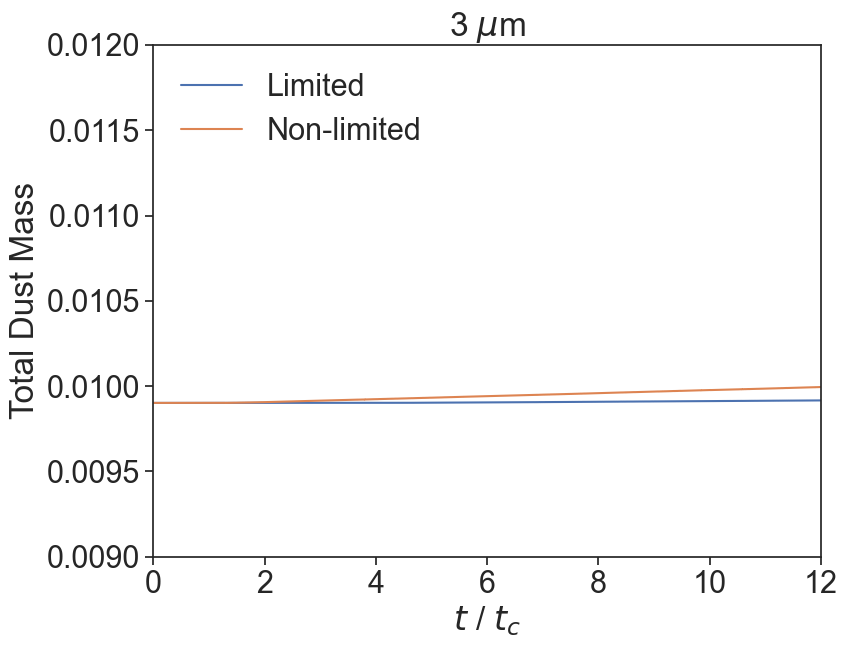

In [11]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='DustMass  1', data=df_3mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='DustMass  1', data=df_3mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0.009, 0.012))
ax.set_xlim((0, 12))
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Total Dust Mass')
ax.set_title('3 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('dustmass-3mic.pdf')

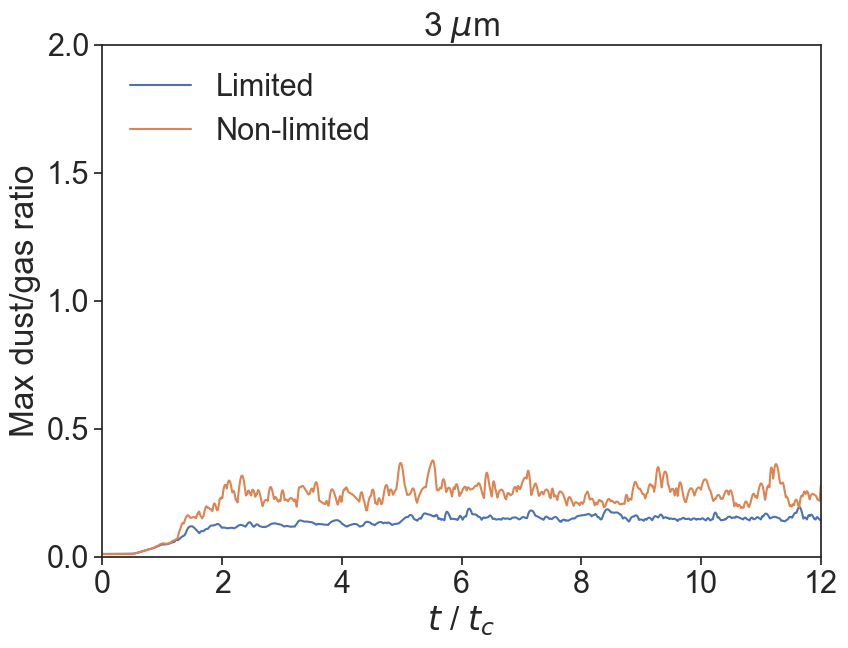

In [12]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='dust/gas X', data=df_3mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='dust/gas X', data=df_3mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0, 2))
ax.set_xlim((0, 12))
ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Max dust/gas ratio')
ax.set_title('3 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('max-dgr-3mic.pdf')

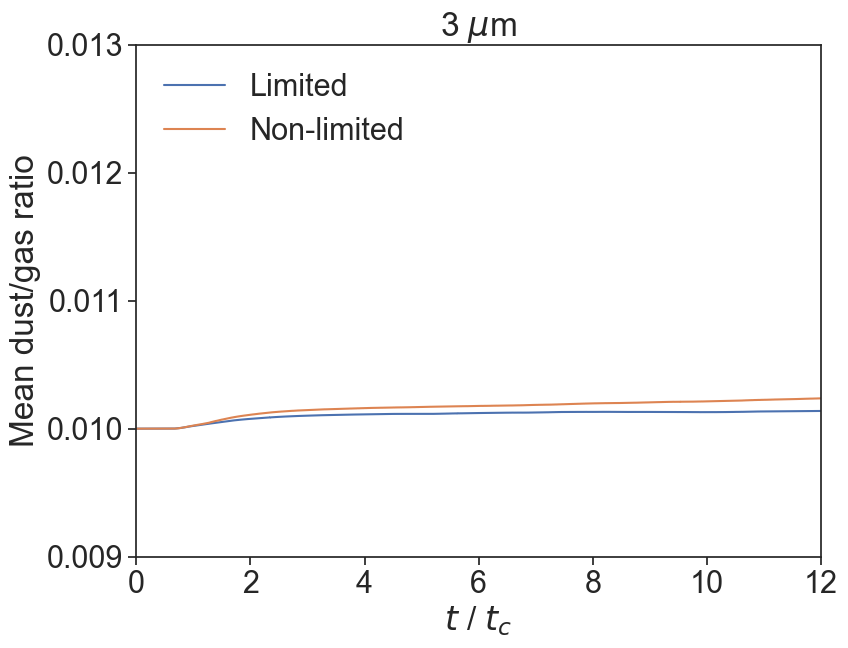

In [13]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='dust/gas A', data=df_3mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='dust/gas A', data=df_3mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0.009, 0.013))
ax.set_xlim((0, 12))
ax.set_yticks([0.009, 0.01, 0.011, 0.012, 0.013])
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Mean dust/gas ratio')
ax.set_title('3 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('mean-dgr-3mic.pdf')

# 10 mic

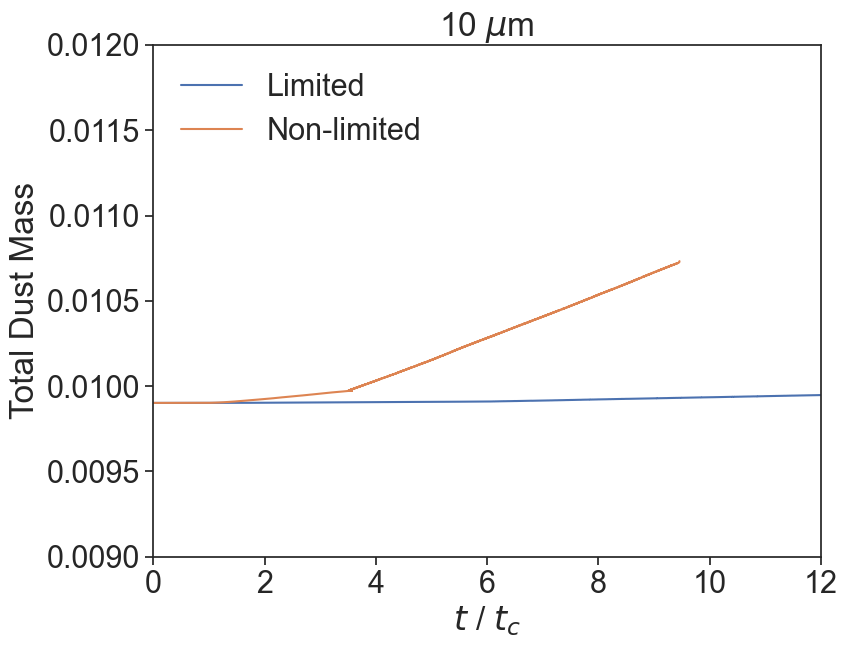

In [19]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='DustMass  1', data=df_10mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='DustMass  1', data=df_10mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0.009, 0.012))
ax.set_xlim((0, 12))
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Total Dust Mass')
ax.set_title('10 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('dustmass-10mic.pdf')

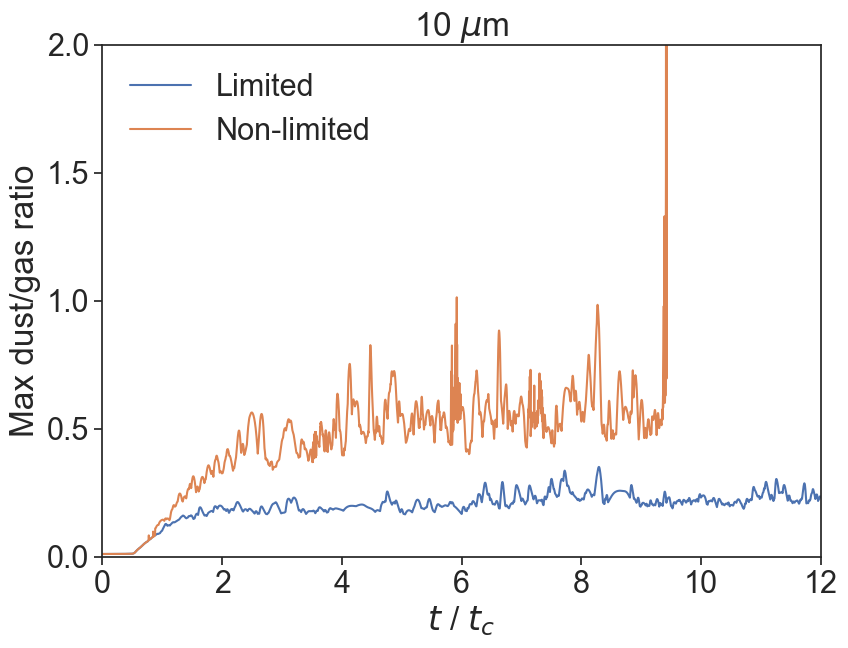

In [20]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='dust/gas X', data=df_10mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='dust/gas X', data=df_10mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0, 2))
ax.set_xlim((0, 12))
ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Max dust/gas ratio')
ax.set_title('10 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('max-dgr-10mic.pdf')

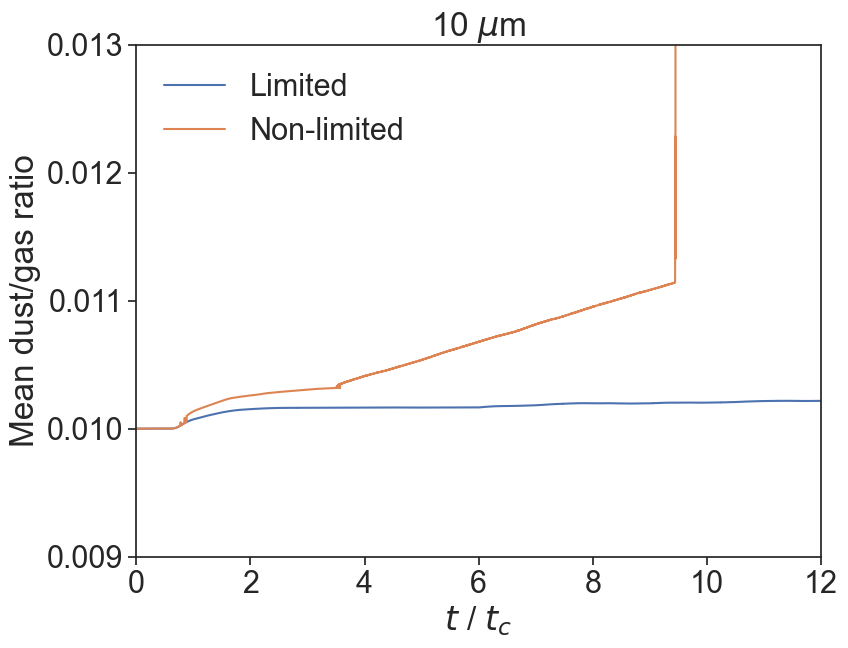

In [21]:
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(x='time', y='dust/gas A', data=df_10mic_l, ax=ax, label='Limited')
sns.lineplot(x='time', y='dust/gas A', data=df_10mic_nl, ax=ax, label='Non-limited')

ax.set_ylim((0.009, 0.013))
ax.set_xlim((0, 12))
ax.set_yticks([0.009, 0.01, 0.011, 0.012, 0.013])
ax.set_xlabel('$t$ / $t_c$')
ax.set_ylabel('Mean dust/gas ratio')
ax.set_title('10 $\mu$m')
ax.legend()
sns.move_legend(ax, "upper left", frameon=False)
ax.legend_.set_title(None)

fig.tight_layout()
fig.savefig('mean-dgr-10mic.pdf')